In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
import os
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('AirPassengers.csv')
df.head()

df.columns = ['Date', 'Number of Passengers']

# Visualization

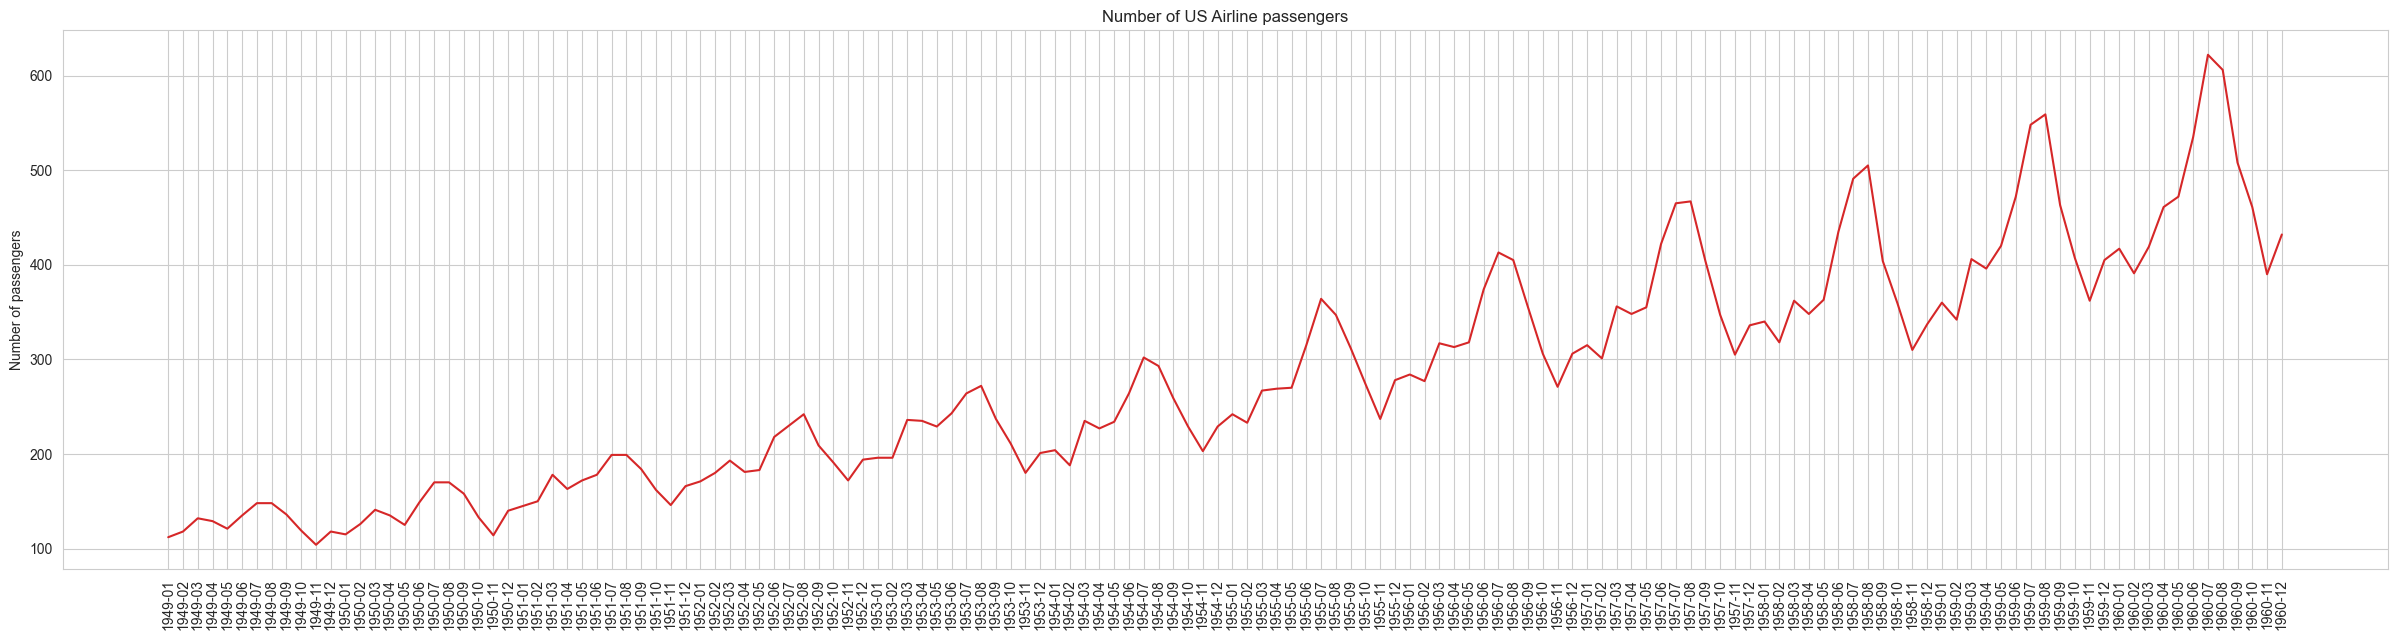

In [9]:
def plot_df(df, x, y, title='', xlabel='', ylabel='Number of passengers', dpi=100):
    plt.figure(dpi=dpi, figsize=(30,7))
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()

plot_df(df, x=df['Date'], y=df['Number of Passengers'], \
    title='Number of US Airline passengers')

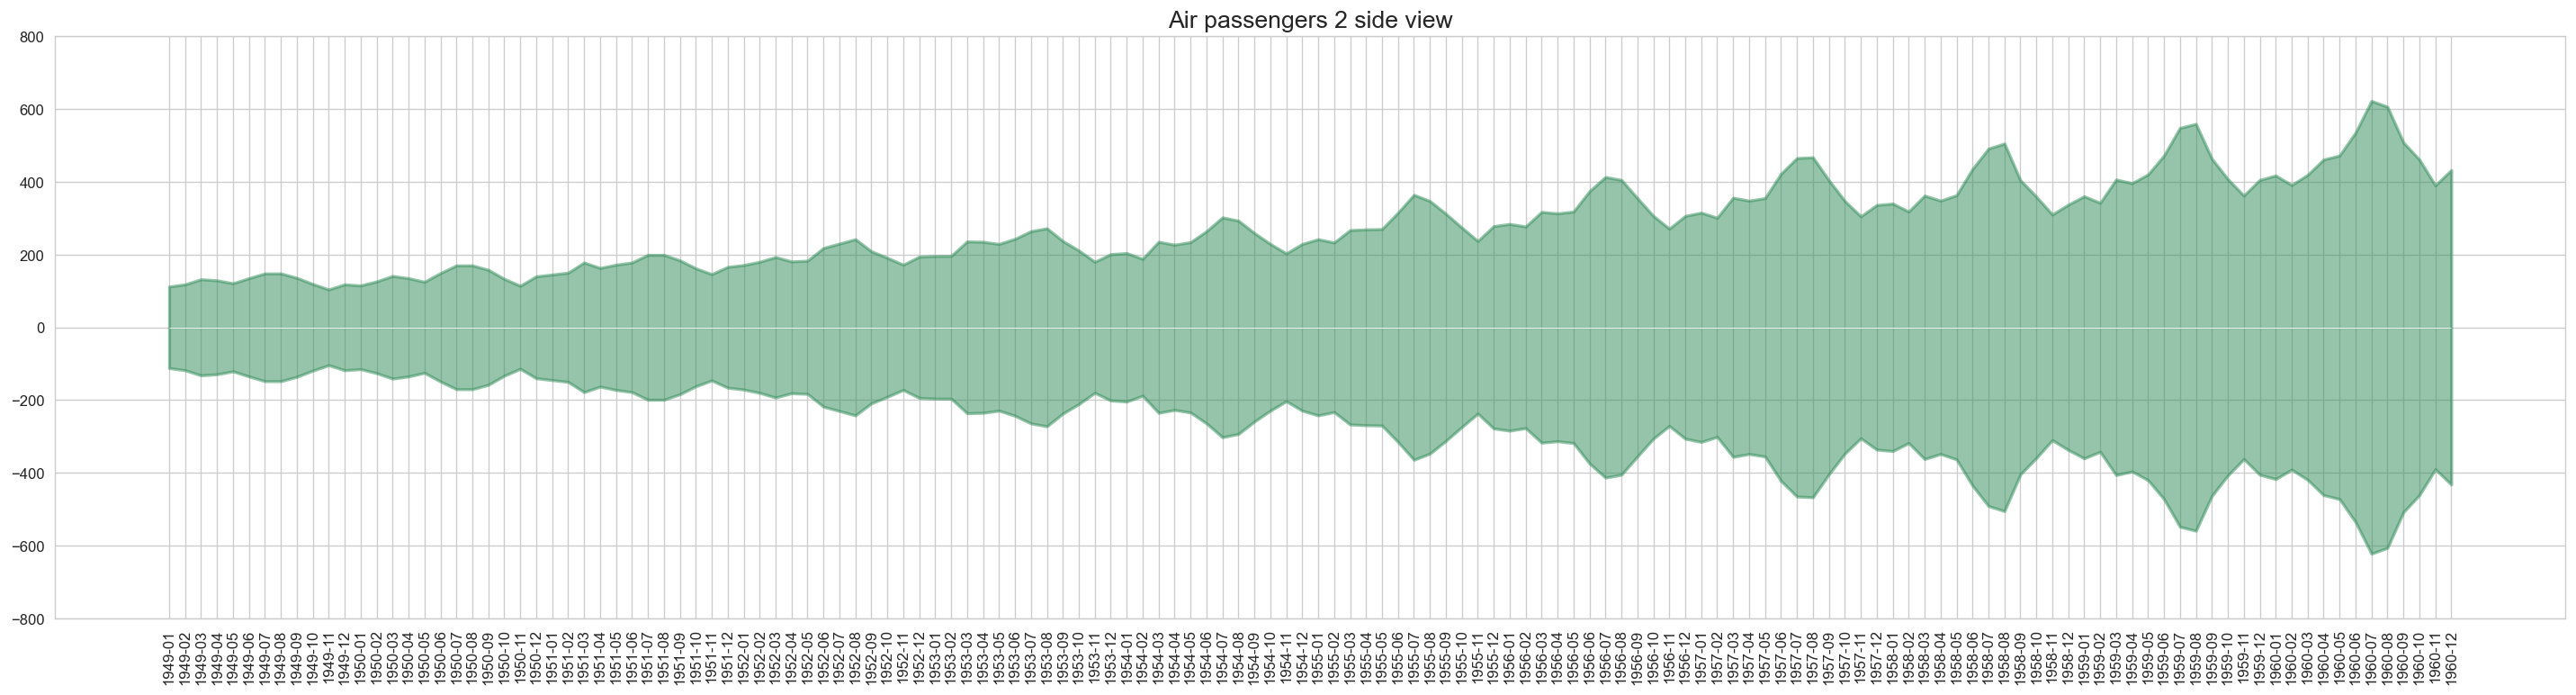

In [11]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

fig, ax = plt.subplots(1,1,figsize=(30, 7), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air passengers 2 side view', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

# Decomposition of Time Series
Base_Level + Trend + Seasonality + Error(Residue)

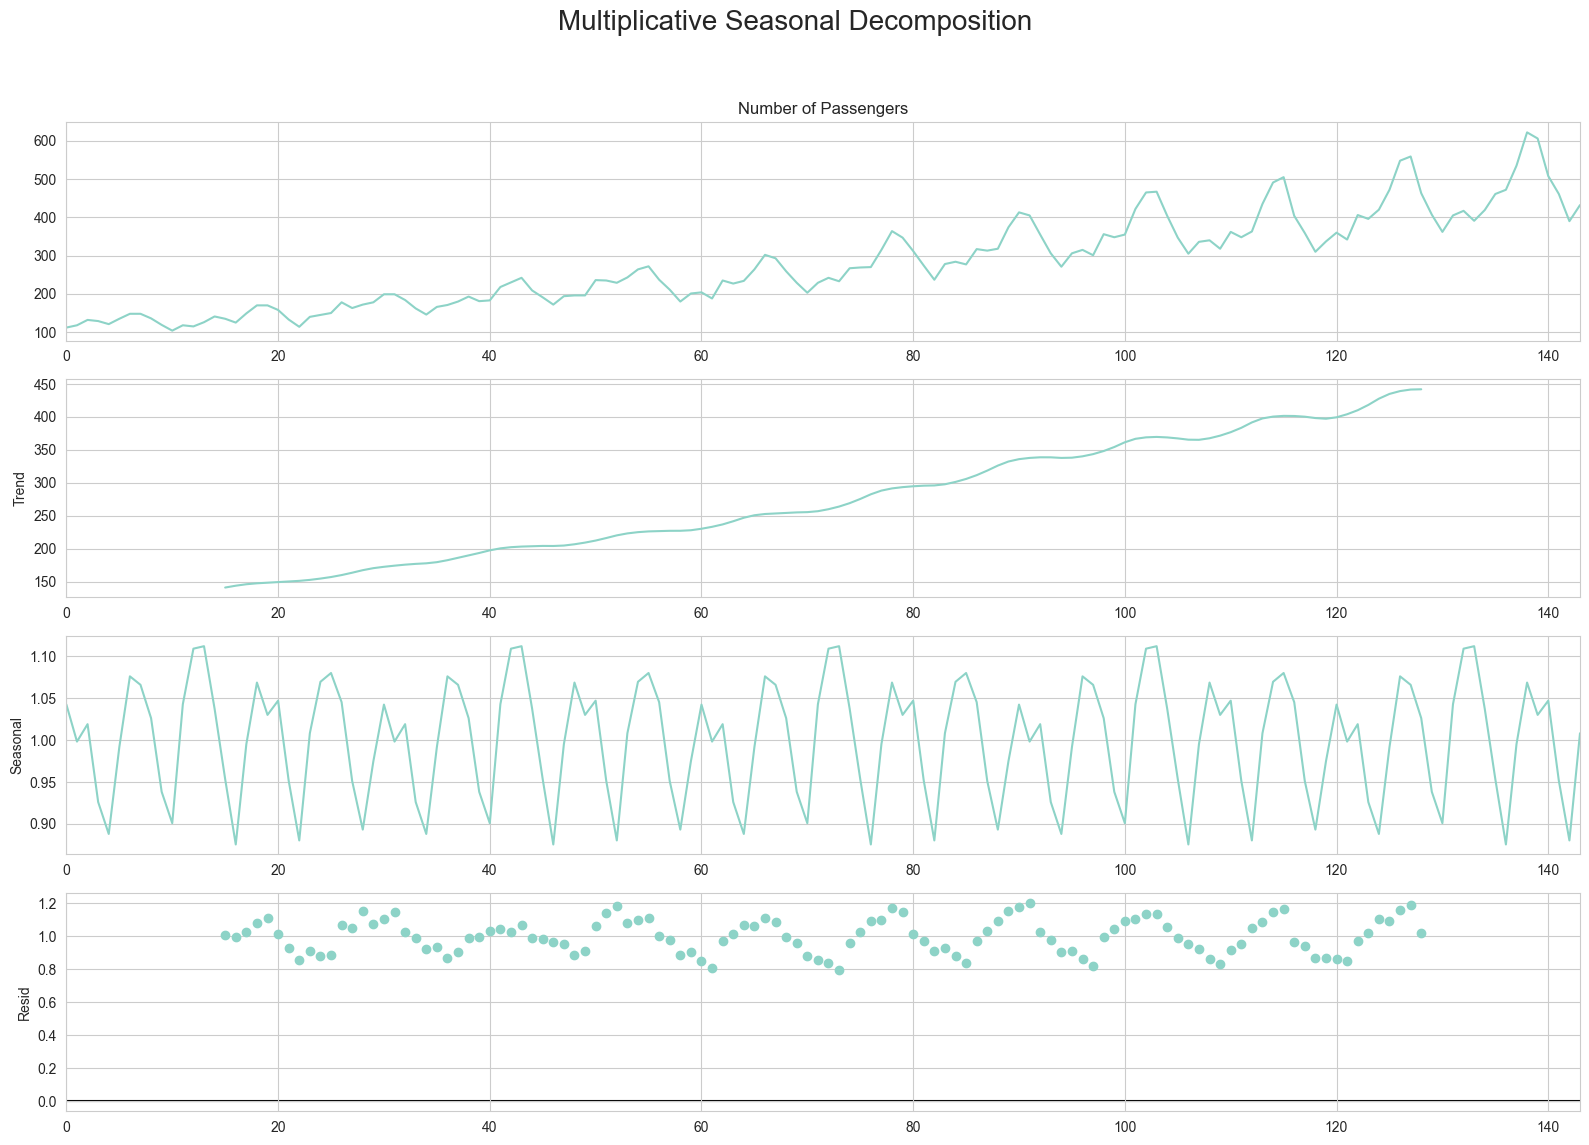

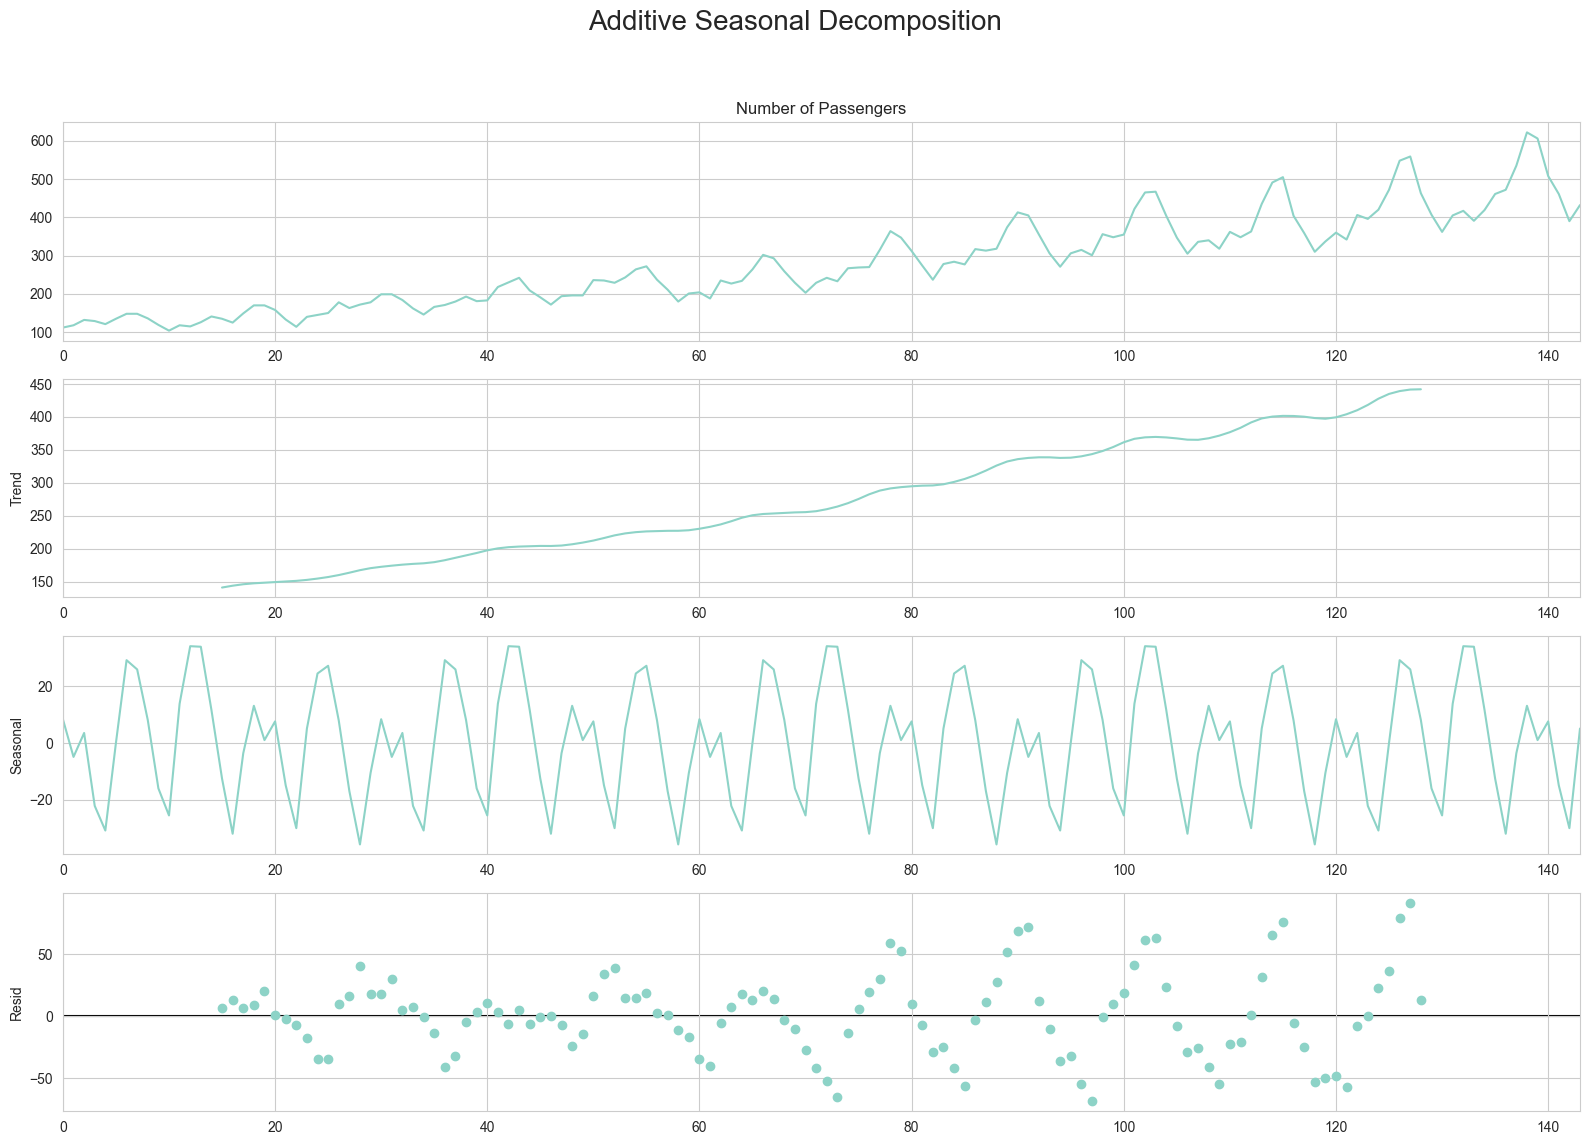

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

multiplicative_seasonal_decompose = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
additive_seasonal_decompose = seasonal_decompose(df['Number of Passengers'],model='additive',period=30)

plt.rcParams.update({'figure.figsize':(16,12)})
multiplicative_seasonal_decompose.plot().suptitle("Multiplicative Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_seasonal_decompose.plot().suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Converting a time series into stationary time series

* Differncinhg the Series (once or multiple times)
* Take the logarithm of the Series
* Take the nth root of the Series
* Combination of all of the above

<AxesSubplot: title={'center': 'Random White Noise'}>

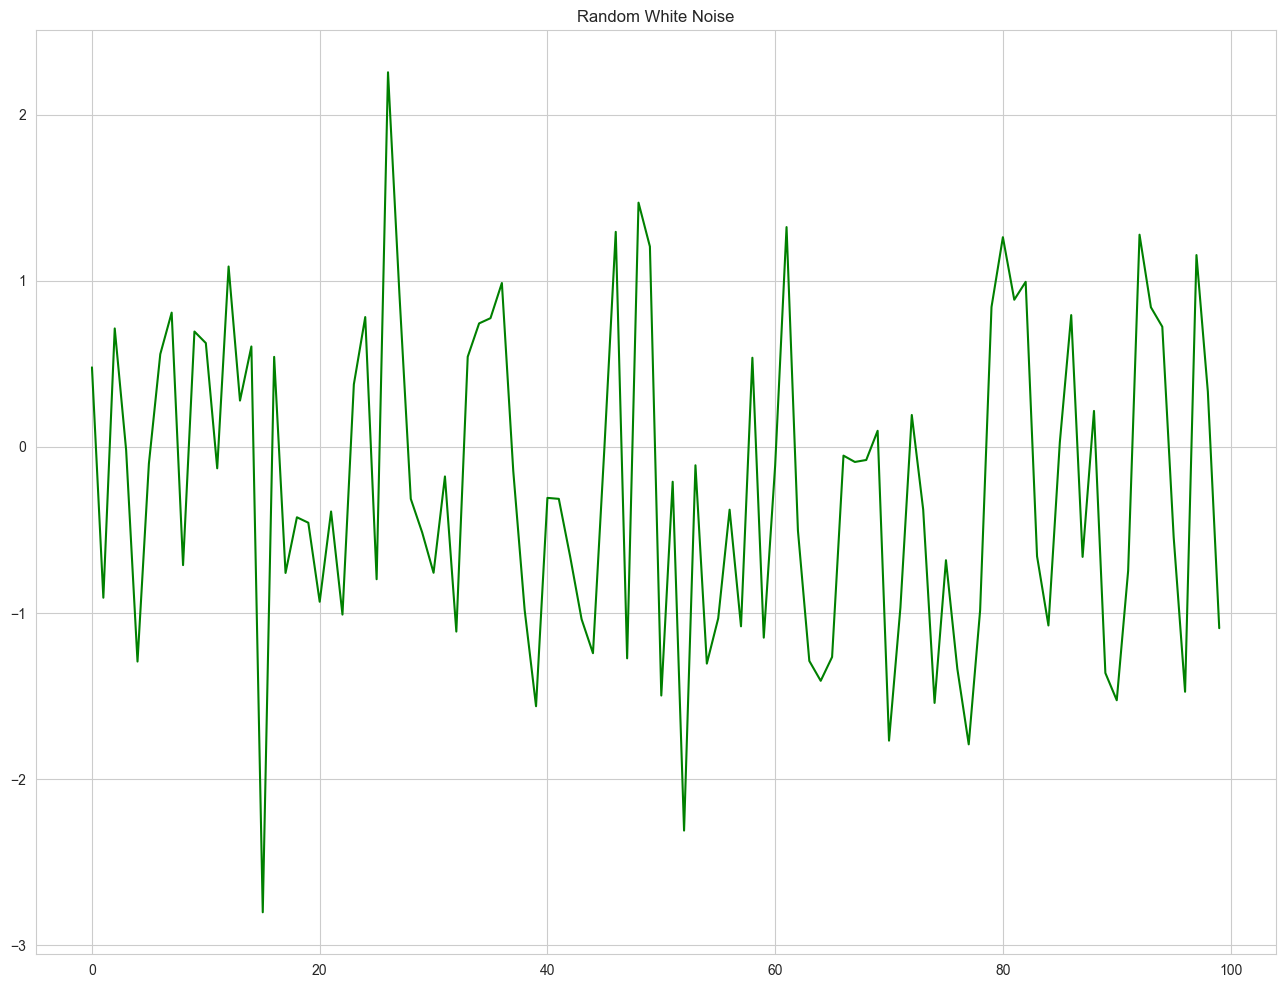

In [17]:
rand_numbers = np.random.randn(100)
pd.Series(rand_numbers).plot(title="Random White Noise", color='g')

# Detrend a Time Series

Text(0.5, 1.0, 'Detrended Number of Passengers subtracting the least squares fit')

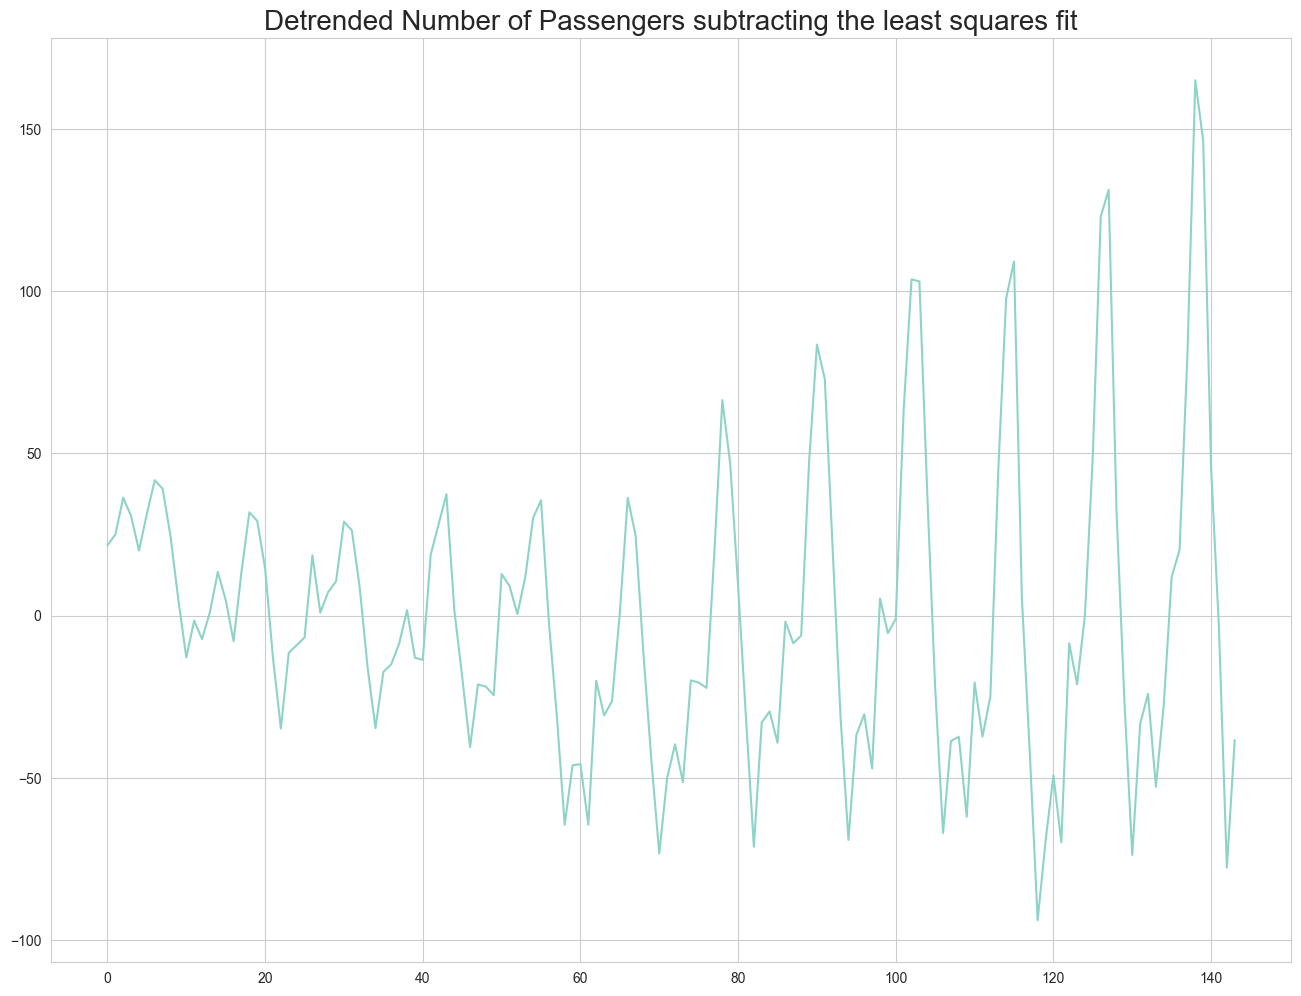

In [18]:
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Detrended Number of Passengers subtracting the least squares fit', fontsize=20)

Text(0.5, 1.0, 'Detrended Number of Passengers')

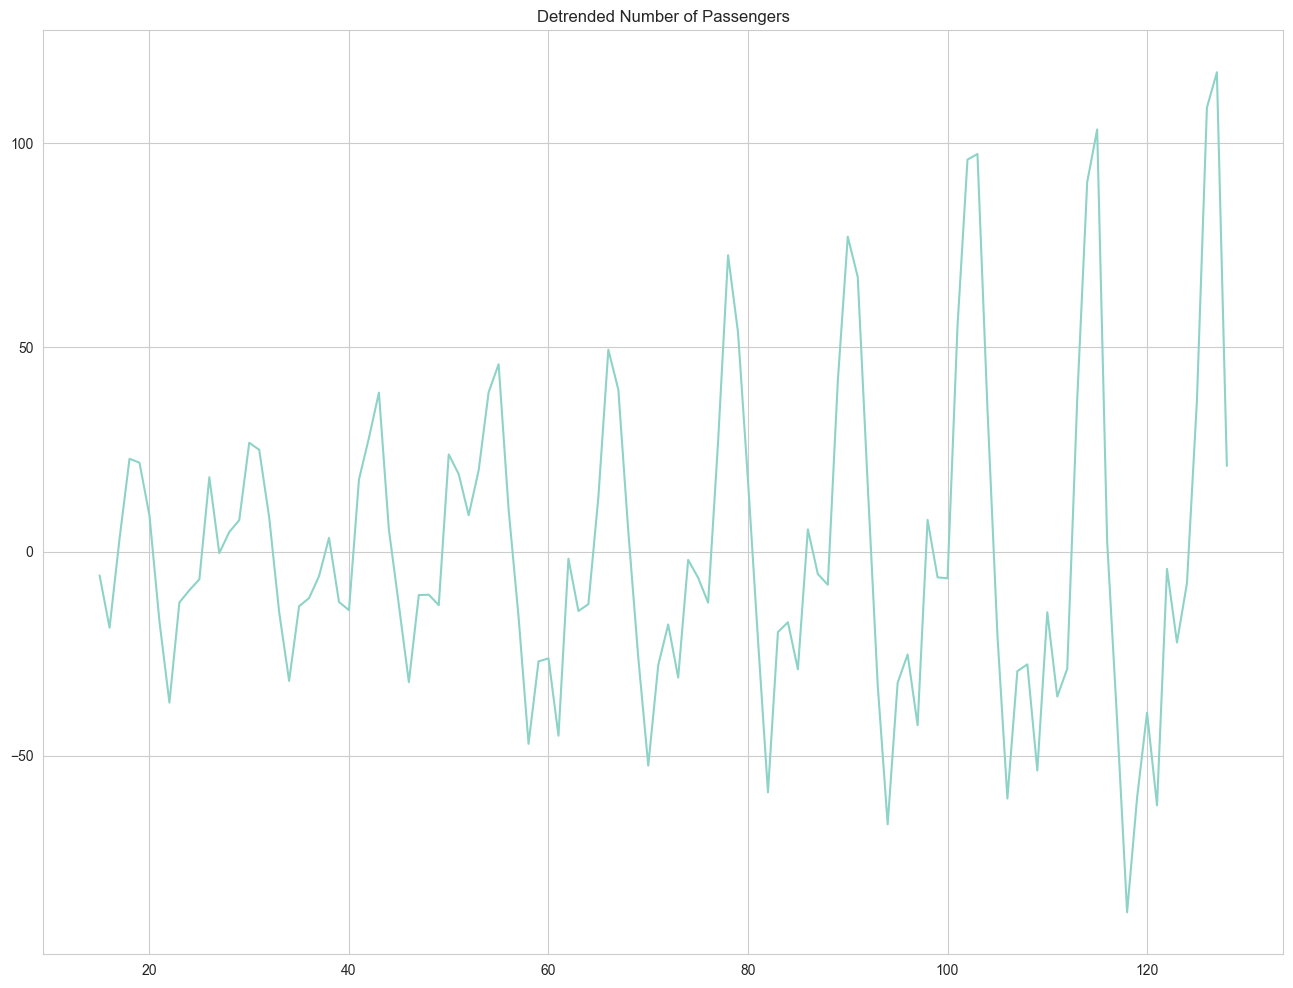

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended_mul = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended_mul)
plt.title('Detrended Number of Passengers')

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

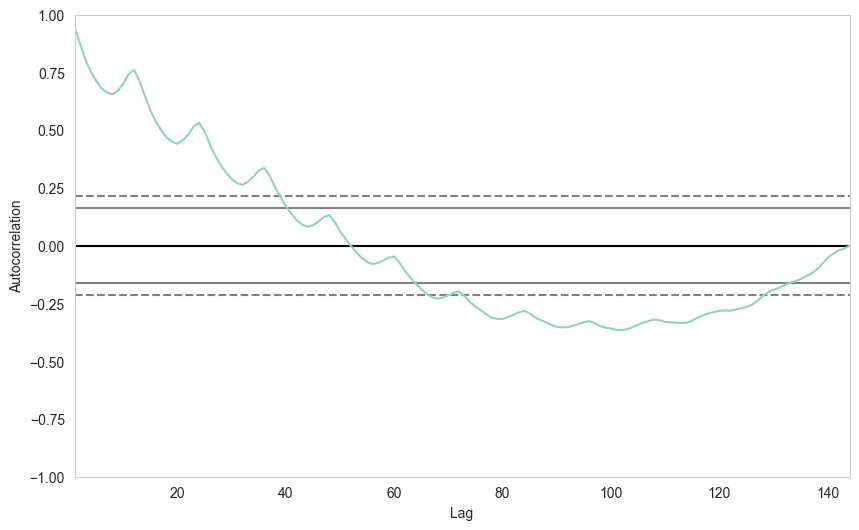

In [20]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (10,6), 'figure.dpi': 100})
autocorrelation_plot(df['Number of Passengers'].tolist())

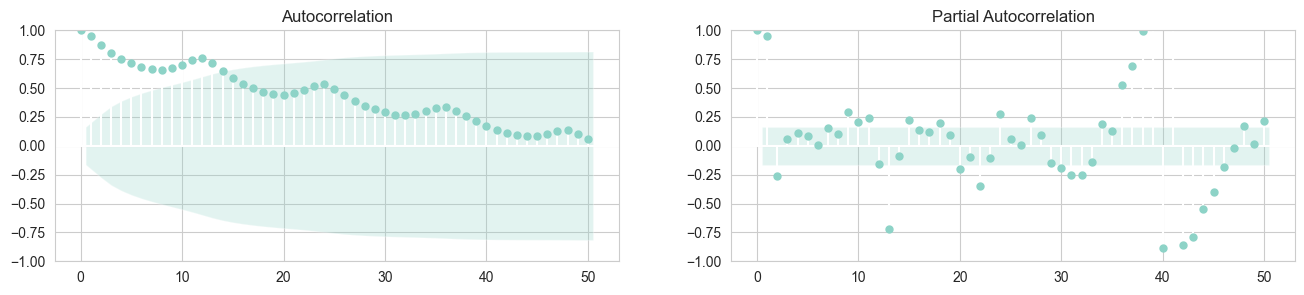

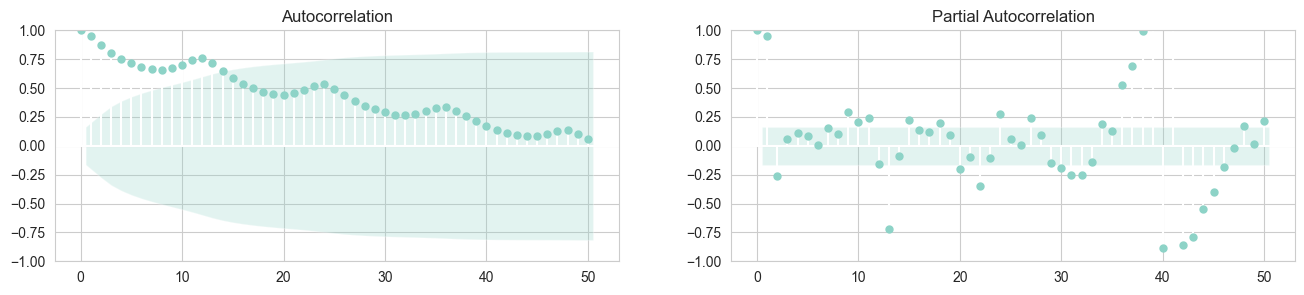

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(16, 3), dpi=100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])


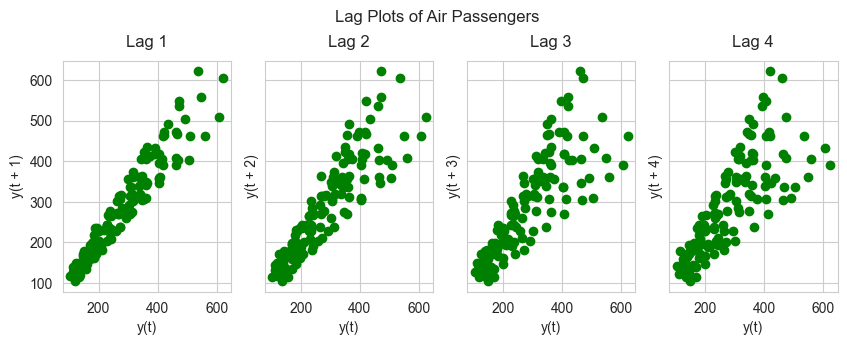

In [24]:
from pandas.plotting import lag_plot

plt.rcParams.update({'ytick.left': False, 'axes.titlepad': 10})

fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharex = True, sharey = True, dpi = 100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag = i + 1, c = 'green', ax = ax)
    ax.set_title(f'Lag {i + 1}')

fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()